# NimbleSearchRetriever

 `NimbleSearchRetriever` enables developers to build RAG applications and AI Agents that can search, access, and retrieve online information from anywhere on the web.

 `NimbleSearchRetriever` harnesses Nimble's Data APIs to execute search queries and retrieve web data in an efficient, scalable, and effective fashion.
 It has two modes:

*   **Search & Retrieve**: Execute a search query, get the top result URLs, and retrieve the text from those URLs.
*   **Retrieve**: Provide a list of URLs, and retrieve the text/data from those URLs.


If you'd like to learn more about the underlying Nimble APIs, visit the [documentation here](https://docs.nimbleway.com/nimble-sdk/web-api/web-api-overview).


## Setup

To begin using `NimbleSearchRetriever`, you'll first need to open an account with Nimble and subscribe to a plan. Nimble offers free trials, [which you can register for here](https://app.nimbleway.com/signup?returnTo=/pipelines/nimbleapi).

For more information about available plans, see our [Pricing page.](https://www.nimbleway.com/pricing)

Once you have registered, you will need to enter the "Nimble API" pipeline in the ["Pipelines" page](https://app.nimbleway.com/pipelines) which will provide you with your API credentials (as a base64 token) that you will use to authenticate your retriever:

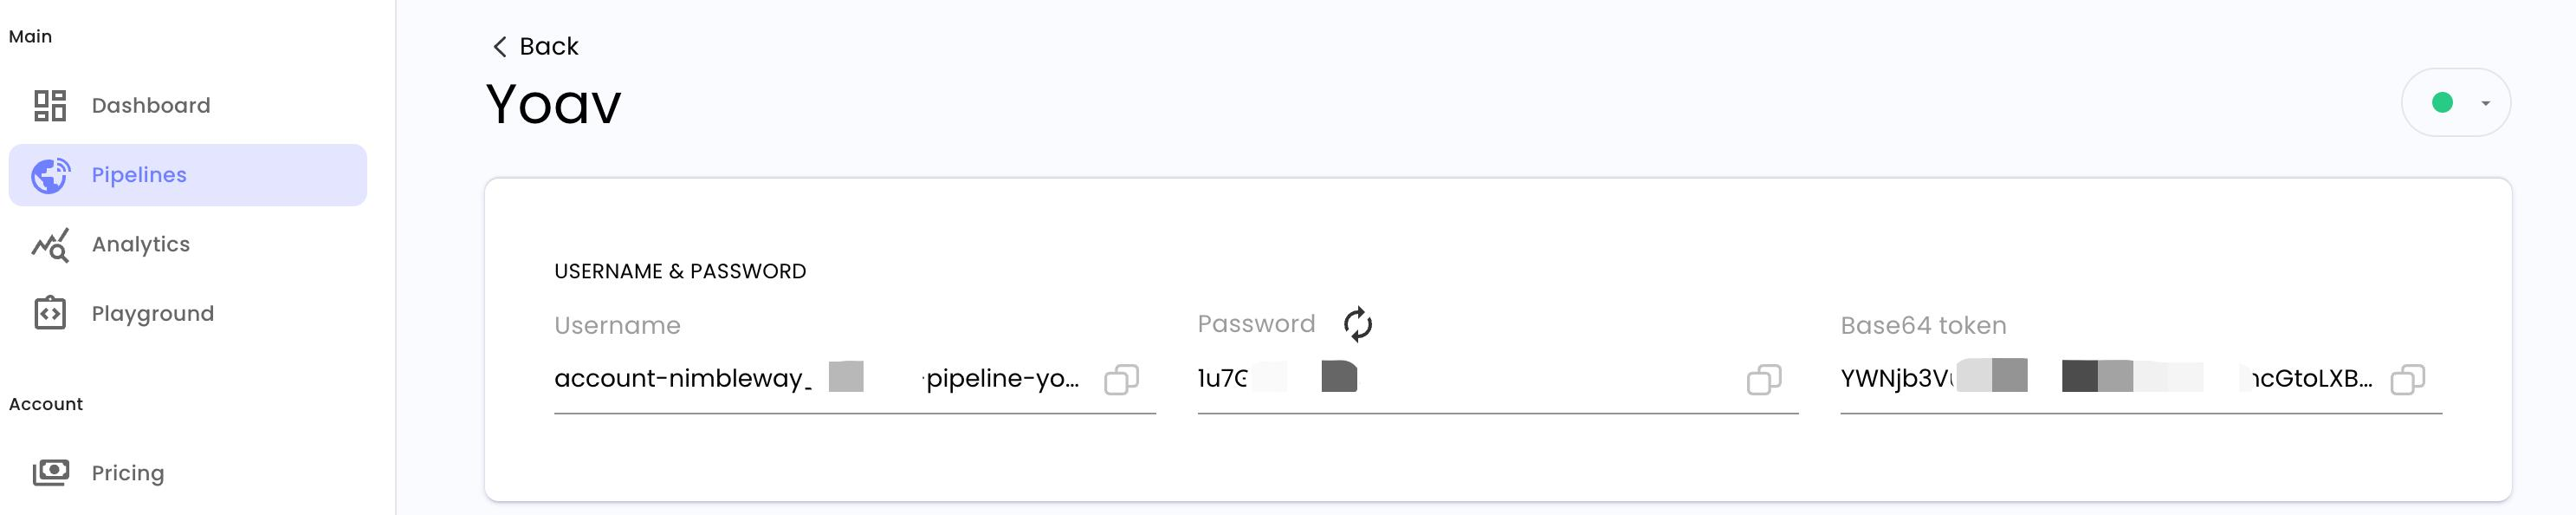

Now, you can set your credential string as an environment variable so `NimbleSearchRetriever` will capture it automatically without having to pass it each time inline.


In [1]:
import getpass
import os

os.environ["NIMBLE_API_KEY"] = getpass.getpass()

For more information about the Authentication process, see [Nimble APIs Authentication Documentation](https://docs.nimbleway.com/nimble-sdk/web-api/nimble-web-api-quick-start-guide/nimble-apis-authentication).

If you want to get automated tracing for individual queries, you can set your [LangSmith](https://docs.smith.langchain.com/) API key by uncommenting below:


In [ ]:
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

### Installation

The retriever is part of langchain providers which is included in the langchain-nimble package available on pypi.

In [ ]:
%pip install -U langchain-nimble langchain-openai

## Instantiation

Now we can instantiate our retriever:


In [3]:
from langchain_nimble import NimbleSearchRetriever

retriever = NimbleSearchRetriever(k=3)

## Usage

`NimbleSearchRetriever` has these arguments:


*   `k` (optional) integer - Number of results to return (less than or equal to 20)
*   `api_key` (optional) string - Nimble's API key, can be sent directly when instantiating the retriever or with the environment variable (`NIMBLE_API_KEY`)
*   `search_engine` (optional) string - The search engine your query will be executed through, you can choose from
    * `google_search` (default value) - Google's search engine
    * `bing_search` - Bing's search engine
    * `yandex_search` - Yandex search engine
*   `render` (optional) boolean - Enables or disables Javascript rendering on the target page (if enabled the results might return more slowly)
*   `locale` (optional) string - LCID standard locale used for the URL request. Alternatively, user can use auto for automatic locale based on country targeting.
*   `country` (optional) string - Country used to access the target URL, use ISO Alpha-2 Country Codes i.e. US, DE, GB
*   `parsing_type` (optional) string - The text structure of the returned `page_content`
    * `plain_text` (default value) - Extracts just the text from the html
    * `markdown` - Markdown format
    * `simplified_html` - Compressed version of the original html document (~8% of the orignial html size)
*   `links` (optional) Array of strings - Array of links to the requested websites to scrape, if chosen will return the raw html content from these html **(THIS WILL ACTIVATE THE SECOND MODE)**

You can read more about each argument in [Nimble's docs](https://docs.nimbleway.com/nimble-sdk/web-api/vertical-endpoints/serp-api/real-time-search-request#request-options).



### Example of search & retrieve mode with a search query string


**Fetching a single document will result in the following:**

In [4]:
import json

query = "Latest trends in artificial intelligence"
example_doc = retriever.invoke(query)[0]
print("Page Content: \n", json.dumps(example_doc.page_content, indent=2))
print("Metadata: \n", json.dumps(example_doc.metadata, indent=2))

Page Content: 
 "8 AI and machine learning trends to watch in 2025 | TechTarget\nSearch Enterprise AI\nSearch the TechTarget Network\nLogin\nRegister\nExplore the Network\nTechTarget Network\nBusiness Analytics\nCIO\nData Management\nERP\nSearch Enterprise AI\nAI Business Strategies\nAI Careers\nAI Infrastructure\nAI Platforms\nAI Technologies\nMore Topics\nApplications of AI\nML Platforms\nOther Content\nNews\nFeatures\nTips\nWebinars\n2024 IT Salary Survey Results\nSponsored Sites\nMore\nAnswers\nConference Guides\nDefinitions\nOpinions\nPodcasts\nQuizzes\nTech Accelerators\nTutorials\nVideos\nFollow:\nHome\nAI business strategies\nTech Accelerator\nWhat is enterprise AI? A complete guide for businesses\nPrev\nNext\n8 jobs that AI can't replace and why\n10 top artificial intelligence certifications and courses for 2025\nDownload this guide1\nX\nFree Download\nA guide to artificial intelligence in the enterprise\nThis wide-ranging guide to artificial intelligence in the enterprise pro

**While invoking the same query without taking just one document will result with:**

In [5]:
retriever.invoke(query)

[Document(metadata={'title': '8 AI and machine learning trends to watch in 2025', 'snippet': 'Jan 3, 2025 — 1. Hype gives way to more pragmatic approaches · 2. Generative AI moves beyond chatbots · 3. AI agents are the next frontier · 4. Generative AI\xa0...', 'url': 'https://www.techtarget.com/searchenterpriseai/tip/9-top-AI-and-machine-learning-trends', 'position': 1, 'entity_type': 'OrganicResult'}, page_content='8 AI and machine learning trends to watch in 2025 | TechTarget\nSearch Enterprise AI\nSearch the TechTarget Network\nLogin\nRegister\nExplore the Network\nTechTarget Network\nBusiness Analytics\nCIO\nData Management\nERP\nSearch Enterprise AI\nAI Business Strategies\nAI Careers\nAI Infrastructure\nAI Platforms\nAI Technologies\nMore Topics\nApplications of AI\nML Platforms\nOther Content\nNews\nFeatures\nTips\nWebinars\n2024 IT Salary Survey Results\nSponsored Sites\nMore\nAnswers\nConference Guides\nDefinitions\nOpinions\nPodcasts\nQuizzes\nTech Accelerators\nTutorials\nVi

### Example of retrieval mode with an array of URLs

In [6]:
retrieverMode2 = NimbleSearchRetriever(links=["example.com"])
retrieverMode2.invoke(input="")

[Document(metadata={'title': None, 'snippet': None, 'url': 'https://example.com', 'position': None, 'entity_type': 'HtmlContent'}, page_content='<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700

## Use within a chain

Like other retrievers, NimbleSearchRetriever can be incorporated into LLM applications via [chains](/docs/how_to/sequence/).

We will need an LLM or chat model:


In [7]:
from langchain_openai import ChatOpenAI

os.environ["OPENAI_API_KEY"] = getpass.getpass()
llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [8]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

prompt = ChatPromptTemplate.from_template(
    """Answer the question based only on the context provided.

Context: {context}

Question: {question}"""
)


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [9]:
chain.invoke("Who is the CEO of Nimbleway?")

'The CEO of Nimble Way is Uriel Knorovich.'